In [1]:
# dependencies
# import PyTorch
import torch
from torch import nn

from torch.utils.data import DataLoader

# import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# import matplotlib for visualization
import matplotlib.pyplot as plt

# import numpy
import numpy as np

In [3]:
# load data
# Setup training data
train_data = datasets.FashionMNIST(
    root="local_training_data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="local_training_data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

In [4]:
# See first training sample
image, label = train_data[0]
# The shape of the image tensor is [1, 28, 28] or more specifically: [color_channels=1, height=28, width=28]
print(type(image), image.shape)
print(type(label))

<class 'torch.Tensor'> torch.Size([1, 28, 28])
<class 'int'>


In [5]:
# float values between 0.0  and 1.0
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [6]:
# How many samples are there?
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [7]:
train_data.data.shape, train_data.targets.shape, test_data.data.shape, test_data.targets.shape

(torch.Size([60000, 28, 28]),
 torch.Size([60000]),
 torch.Size([10000, 28, 28]),
 torch.Size([10000]))

In [6]:
type(train_data)

torchvision.datasets.mnist.FashionMNIST

In [8]:
# see classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [10]:
def plot_image(image, title=None, cmap="gray"):
    plt.imshow(image, cmap=cmap)
    if title:
        plt.title(title)
    plt.show()

Image shape: torch.Size([1, 28, 28])
Image shape: torch.Size([28, 28])


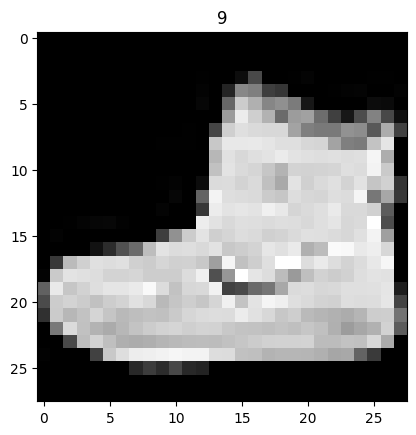

In [11]:
# get first sample
image, label = train_data[0]
print(f"Image shape: {image.shape}")
# squeeze the first dimension (1)
image = image.squeeze()
print(f"Image shape: {image.shape}")

plot_image(image,label)

In [52]:
# plot more images
torch.manual_seed(42)
# data to visualize
images = []
titles = []
# 4x4 images
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    print(random_idx)
    img, label = train_data[random_idx]
    images.append(image)
    titles.append(class_names[label])

print(len(images))
print(len(titles))
print(type(images[0]))
print(images[0].shape)

37542
46067
46876
46414
10026
27335
38620
11924
14950
57113
31378
29014
47210
18954
18231
47572
16
16
<class 'torch.Tensor'>
torch.Size([28, 28])


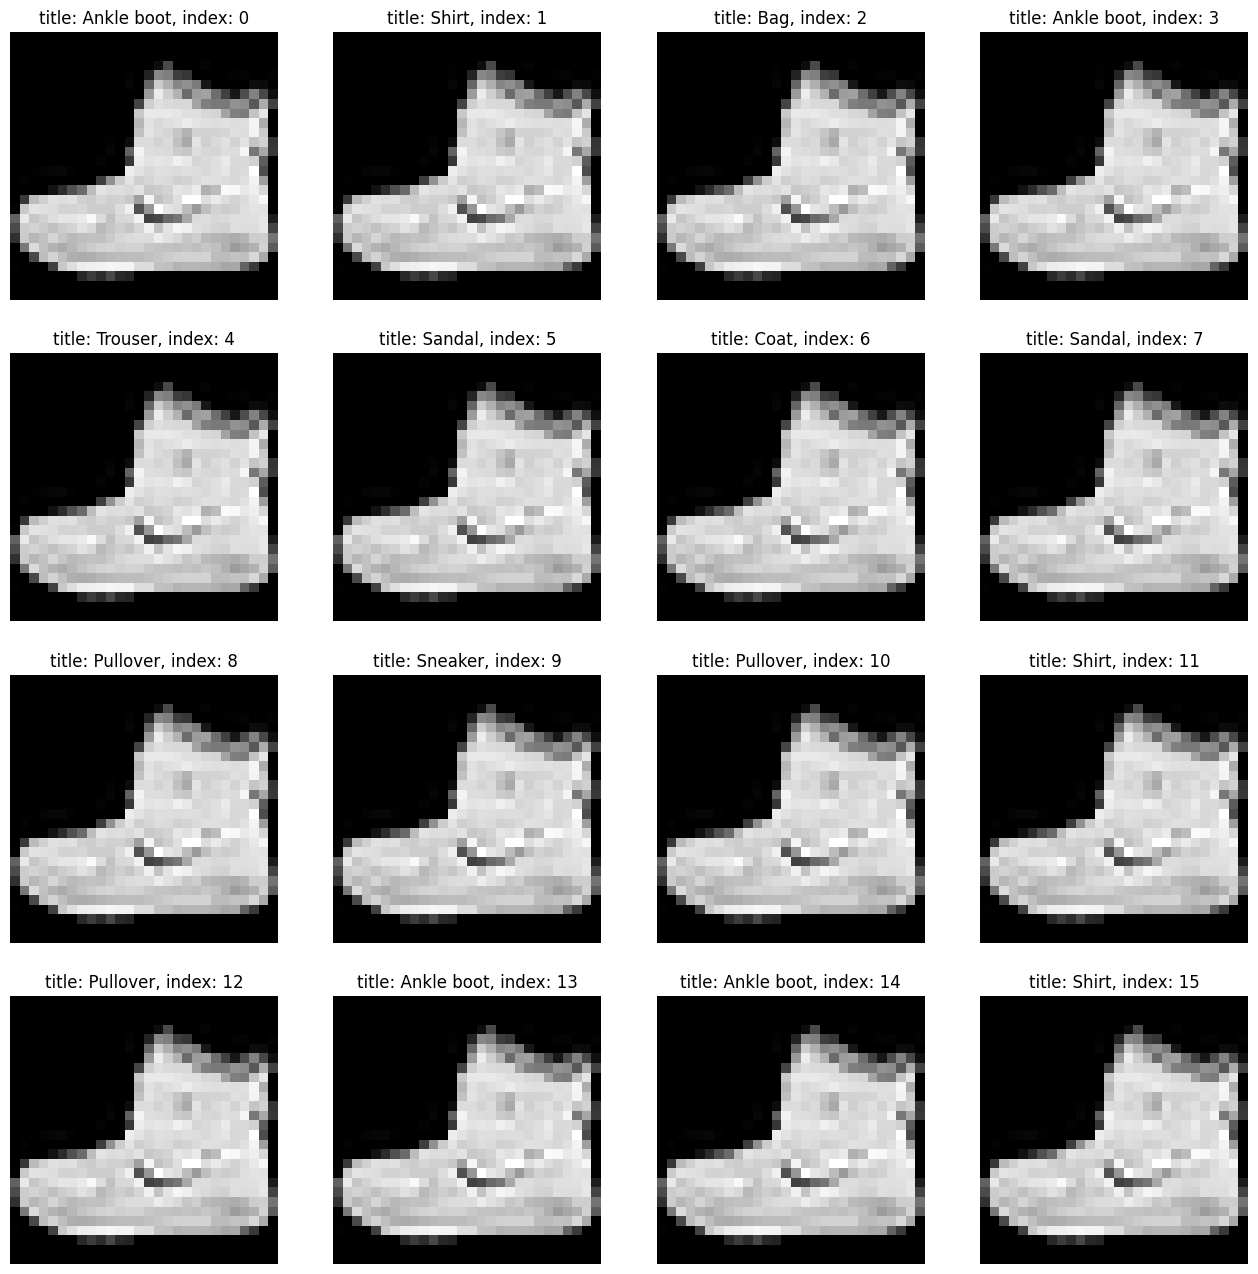

In [17]:
def plot_images_grid(images, grid_size, titles, size=(16, 16), cmap="gray"):
    nrows, ncols = grid_size

    if len(images) > nrows * ncols:
        raise ValueError(
            "The number of images exceeds the grid size. Please increase the grid size or reduce the number of images."
        )

    if nrows == 1 and ncols == 1:
        _, ax = plt.subplots(figsize=size)
        ax.imshow(images[0], cmap)
        if titles is not None:
            ax.set_title(titles[0])
        ax.axis("off")
    else:
        _, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=size)
        for idx, ax in enumerate(axes.flat):
            if idx < len(images):
                ax.imshow(images[idx], cmap=cmap)
                if titles is not None and idx < len(titles):
                    ax.set_title("title: {}, index: {}".format(titles[idx], idx))

            ax.axis("off")
    plt.show()

plot_images_grid(
    images=images,    
    grid_size=(rows, cols),
    titles=titles,
)

In [18]:
# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x1696b8400>, <torch.utils.data.dataloader.DataLoader object at 0x165ac9f70>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [19]:
# let's inspect a batch
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [20]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [21]:
# Model
# It follows the typical structure of a convolutional neural network:
# Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer
# Where the contents of [Convolutional layer -> activation layer -> pooling layer] can be upscaled and repeated multiple times, 
# depending on requirements.

# Create a convolutional neural network model
class FashionMNISTConvnet(nn.Module):
    def __init__(self, input_channel: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.convnet_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_channel, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.convnet_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            # No softmax here, as it's included in the CrossEntropyLoss
            nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.convnet_block_1(x)
        #print(x.shape)
        x = self.convnet_block_2(x)
        #print(x.shape)
        x = self.classifier(x)
        #print(x.shape)
        return x

In [22]:
model = FashionMNISTConvnet(input_channel=1, hidden_units=10, output_shape=len(class_names)).to(device)
model

FashionMNISTConvnet(
  (convnet_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (convnet_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [23]:
# let's run the model
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 1, 28, 28)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")

Image batch shape: torch.Size([32, 1, 28, 28]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]


In [16]:
preds = model(images)
print(len(preds))
print(preds[0])

32
tensor([-0.0444, -0.0445, -0.0105, -0.0025,  0.0780,  0.0103, -0.0396,  0.0926,
        -0.0483, -0.0172], grad_fn=<SelectBackward0>)


In [25]:
# Setup a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

In [26]:
# calculate accuracy (a classification metric)
def accuracy_fn(y_target, y_pred):
    correct = torch.eq(y_target, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

# calculate predictions
def convert_to_pred(logits):
    return torch.softmax(logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels

In [27]:
def fit_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               convert_to_pred_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    # set to device
    model.to(device)
    # Training
    model.train()    
    for X, y in data_loader:
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_hat = model(X)
        y_pred = convert_to_pred_fn(y_hat)
        #y_pred = torch.softmax(y_hat, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels

        # 2. Calculate loss
        loss = loss_fn(y_hat, y)
        train_loss += loss
        train_acc += accuracy_fn(y, y_pred)

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")
    return (train_loss.detach().item(), train_acc)

def evaluate_model(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              convert_to_pred_fn,
              device: torch.device = device):
    val_loss, val_acc = 0, 0
    # set to device
    model.to(device)
    # put model in eval mode
    model.eval()
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            y_hat = model(X)
            y_pred = convert_to_pred_fn(y_hat)
            # y_pred = torch.softmax(y_hat, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
            
            # 2. Calculate loss and accuracy
            val_loss += loss_fn(y_hat, y)
            val_acc += accuracy_fn(y, y_pred)
        
        # Adjust metrics and print out
        val_loss /= len(data_loader)
        val_acc /= len(data_loader)
        print(f"Evaluation loss: {val_loss:.5f} | Evaluation accuracy: {val_acc:.2f}%\n")
        return (val_loss.detach().item(), val_acc)

In [29]:
# Train model
epochs = 3
results = {
    "train_loss": [],
    "train_acc": [],
    "val_loss": [],
    "val_acc": []
    
}
for epoch in range(epochs):
    print(f"Epoch: {epoch}\n---------")
    train_loss, train_acc = fit_model(data_loader=train_dataloader,
        model=model, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        convert_to_pred_fn=convert_to_pred,
        device=device
    )
    val_loss, val_acc = evaluate_model(data_loader=test_dataloader,
        model=model,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        convert_to_pred_fn=convert_to_pred,
        device=device
    )
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["val_loss"].append(val_loss)
    results["val_acc"].append(val_acc)

# print out the results
print(results)

Epoch: 0
---------
Train loss: 0.35471 | Train accuracy: 87.16%
Test loss: 0.34865 | Test accuracy: 87.51%

Epoch: 1
---------
Train loss: 0.32230 | Train accuracy: 88.29%
Test loss: 0.35924 | Test accuracy: 87.30%

Epoch: 2
---------
Train loss: 0.30443 | Train accuracy: 89.03%
Test loss: 0.33584 | Test accuracy: 87.41%

{'train_loss': [0.3547080159187317, 0.3222982883453369, 0.3044256567955017], 'train_acc': [87.15833333333333, 88.28666666666666, 89.02833333333334], 'val_loss': [0.34864917397499084, 0.35923540592193604, 0.3358428180217743], 'val_acc': [87.5099840255591, 87.30031948881789, 87.41014376996804]}


In [30]:
print(results)

{'train_loss': [0.3547080159187317, 0.3222982883453369, 0.3044256567955017], 'train_acc': [87.15833333333333, 88.28666666666666, 89.02833333333334], 'val_loss': [0.34864917397499084, 0.35923540592193604, 0.3358428180217743], 'val_acc': [87.5099840255591, 87.30031948881789, 87.41014376996804]}


In [31]:
def plot_training_results(results):
    """Plots training curves of a results dictionary.
    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "val_loss": [...],
             "val_acc": [...]}
    """
    loss = results["train_loss"]
    test_loss = results["val_loss"]

    accuracy = results["train_acc"]
    test_accuracy = results["val_acc"]

    epochs = range(len(results["train_loss"]))

    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="val_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

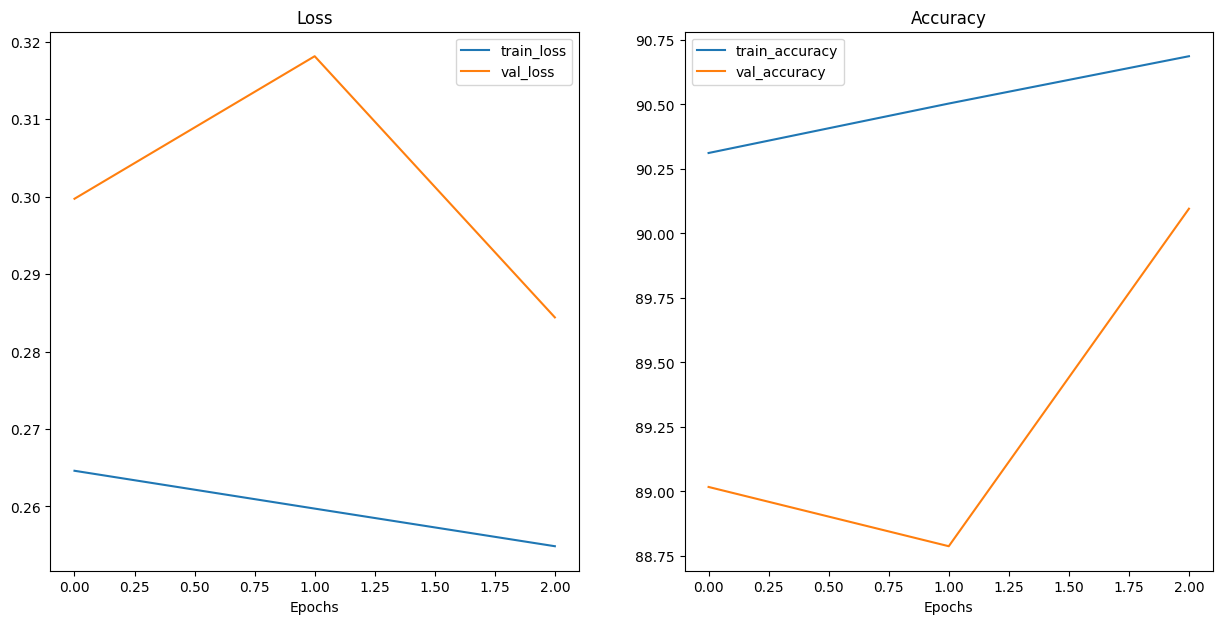

In [33]:
plot_training_results(results)

In [33]:
# evaluate the model with testing data
val_loss, val_acc = evaluate_model(data_loader=test_dataloader,
    model=model,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    convert_to_pred_fn=convert_to_pred,
    device=device
)
print(val_loss, val_acc)

Test loss: 0.33584 | Test accuracy: 87.41%

0.3358428180217743 87.41014376996804


In [34]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for x in data:
            # Prepare x
            x = torch.unsqueeze(x, dim=0).to(device) # Add an extra dimension and send x to device

            # Forward pass (model outputs raw logit)
            y_logits = model(x)

            y_logits = y_logits.squeeze() # remove extra dimension
            y_prob = torch.softmax(y_logits, dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get y_prob off GPU for further calculations
            pred_probs.append(y_prob.cpu())
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [36]:
indexes = np.random.randint(0, len(test_dataloader), size=10)
print(indexes)

sample_data = []
sample_target = []
for i in indexes:
    # print(i)
    sample, target = test_data[i]
    sample_data.append(sample)
    sample_target.append(target)

print(len(sample_data))
print(type(sample_data[0]))
print(sample_data[0].shape)

[220 168 136  14  27 211 254 172 104  47]
10
<class 'torch.Tensor'>
torch.Size([1, 28, 28])


In [37]:
pred_probs = make_predictions(model, sample_data, device)

In [38]:
print(pred_probs)

tensor([[1.7898e-04, 1.5851e-08, 1.5595e-05, 2.5583e-08, 7.9256e-06, 4.4998e-07,
         1.5906e-04, 1.4823e-05, 9.9958e-01, 4.0858e-05],
        [7.3515e-04, 1.7720e-04, 1.4801e-02, 2.0522e-03, 9.2640e-01, 1.1470e-05,
         3.6715e-02, 6.4219e-06, 1.9032e-02, 6.6793e-05],
        [6.5251e-03, 2.3023e-05, 7.5962e-01, 1.8402e-04, 5.4094e-03, 5.1544e-06,
         2.2788e-01, 6.8806e-06, 3.2116e-04, 2.9941e-05],
        [2.0307e-04, 4.4016e-05, 2.5793e-01, 1.9445e-04, 6.2642e-01, 1.8053e-06,
         1.1193e-01, 3.5500e-06, 3.2183e-03, 4.7682e-05],
        [6.5751e-01, 1.4551e-02, 3.6492e-03, 4.1282e-02, 4.1155e-04, 6.7838e-06,
         2.8208e-01, 1.0719e-04, 3.5988e-04, 3.7341e-05],
        [1.7744e-05, 9.9989e-01, 2.6548e-09, 3.4904e-05, 4.9477e-05, 1.5878e-07,
         4.5707e-06, 8.5459e-08, 5.2588e-07, 6.8958e-08],
        [5.9638e-05, 4.3277e-08, 2.6136e-08, 8.3858e-10, 4.6868e-10, 9.9958e-01,
         1.1493e-07, 7.5815e-05, 2.4322e-04, 4.1594e-05],
        [1.8317e-03, 1.3367

In [39]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
print(pred_classes)
print(sample_target)

tensor([8, 4, 2, 4, 0, 1, 5, 2, 7, 1])
[8, 4, 2, 4, 0, 1, 5, 2, 7, 1]


In [42]:
pred_titles = []

for i in pred_classes:    
    idx = i.item()
    pred_titles.append(class_names[idx])

In [44]:
sample_titles =  []

for i in sample_target:    
    sample_titles.append(class_names[i])

In [56]:
images = []

for img in sample_data:
    images.append(img.squeeze())

print(type(images[0]))
print(images[0].shape)

<class 'torch.Tensor'>
torch.Size([28, 28])


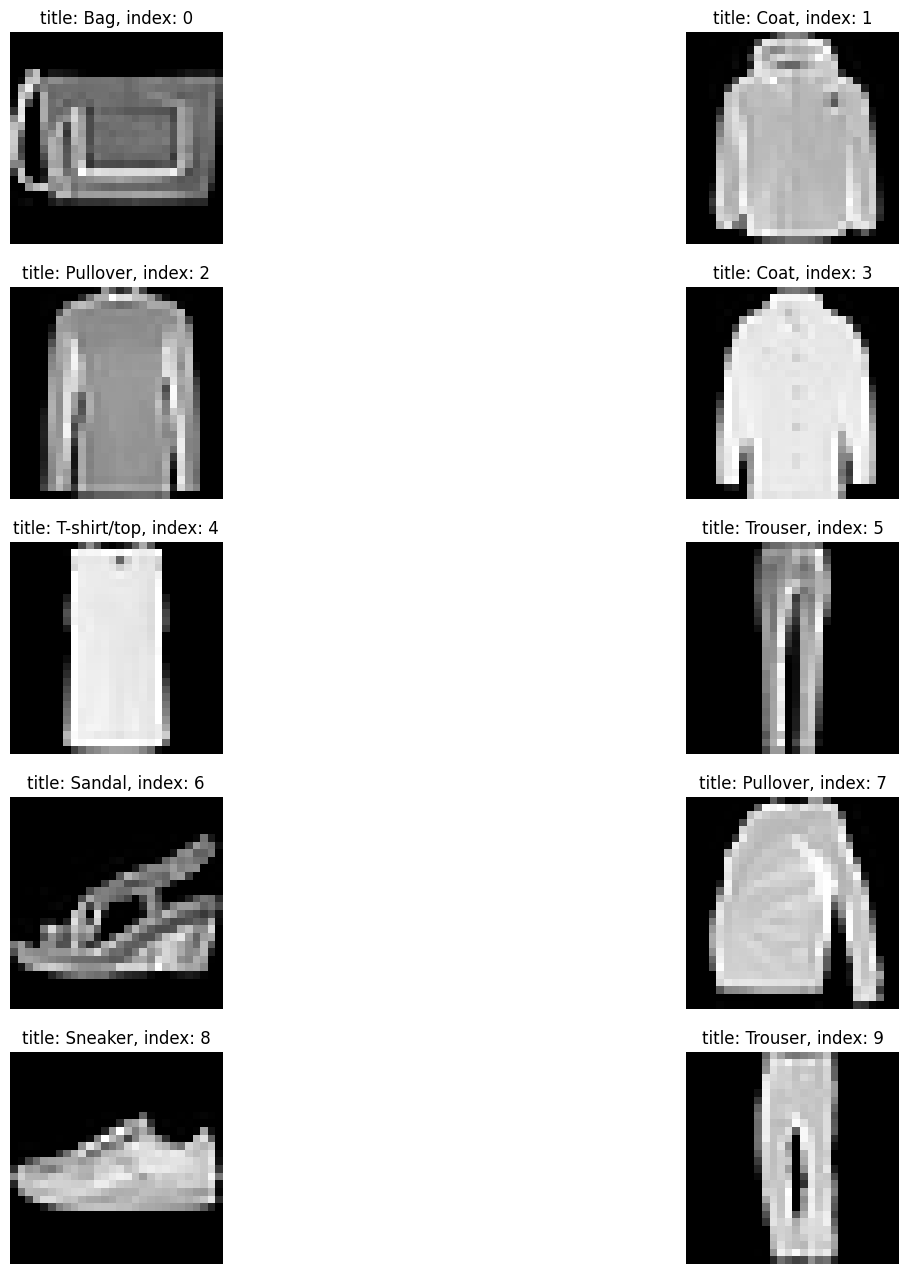

In [57]:
# plot images
plot_images_grid(
    images=images,    
    grid_size=(5, 2),
    titles=sample_titles,
)

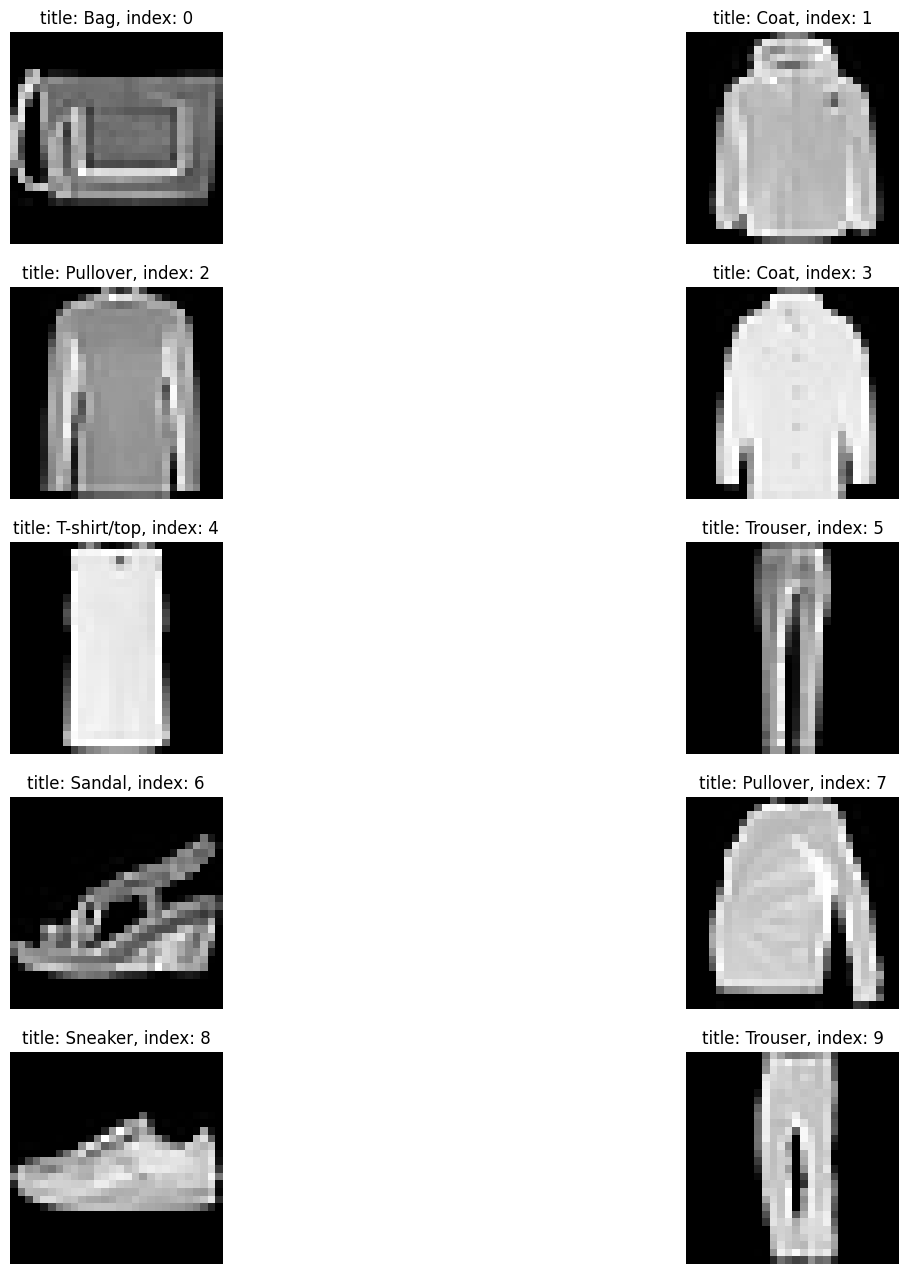

In [58]:
# plot images
plot_images_grid(
    images=images,    
    grid_size=(5, 2),
    titles=pred_titles,
)

In [59]:
# save the model
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
models_path = Path("models")
models_path.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
model_name = "03_pytorch_computer_vision_model_2.pth"
trained_model_path = models_path / model_name

# Save the model state dict
print(f"Saving model to: {trained_model_path}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=trained_model_path)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [61]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
loaded_model = FashionMNISTConvnet(input_channel=1, hidden_units=10, output_shape=len(class_names))
loaded_model

FashionMNISTConvnet(
  (convnet_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (convnet_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [62]:
# Load in the saved state_dict()
loaded_model.load_state_dict(torch.load(f=trained_model_path))

# Send model to GPU
loaded_model = loaded_model.to(device)

In [64]:
pred_probs = make_predictions(loaded_model, sample_data, device)
pred_probs

tensor([[1.7898e-04, 1.5851e-08, 1.5595e-05, 2.5583e-08, 7.9256e-06, 4.4998e-07,
         1.5906e-04, 1.4823e-05, 9.9958e-01, 4.0858e-05],
        [7.3515e-04, 1.7720e-04, 1.4801e-02, 2.0522e-03, 9.2640e-01, 1.1470e-05,
         3.6715e-02, 6.4219e-06, 1.9032e-02, 6.6793e-05],
        [6.5251e-03, 2.3023e-05, 7.5962e-01, 1.8402e-04, 5.4094e-03, 5.1544e-06,
         2.2788e-01, 6.8806e-06, 3.2116e-04, 2.9941e-05],
        [2.0307e-04, 4.4016e-05, 2.5793e-01, 1.9445e-04, 6.2642e-01, 1.8053e-06,
         1.1193e-01, 3.5500e-06, 3.2183e-03, 4.7682e-05],
        [6.5751e-01, 1.4551e-02, 3.6492e-03, 4.1282e-02, 4.1155e-04, 6.7838e-06,
         2.8208e-01, 1.0719e-04, 3.5988e-04, 3.7341e-05],
        [1.7744e-05, 9.9989e-01, 2.6548e-09, 3.4904e-05, 4.9477e-05, 1.5878e-07,
         4.5707e-06, 8.5459e-08, 5.2588e-07, 6.8958e-08],
        [5.9638e-05, 4.3277e-08, 2.6136e-08, 8.3858e-10, 4.6868e-10, 9.9958e-01,
         1.1493e-07, 7.5815e-05, 2.4322e-04, 4.1594e-05],
        [1.8317e-03, 1.3367

In [65]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
print(pred_classes)
print(sample_target)

tensor([8, 4, 2, 4, 0, 1, 5, 2, 7, 1])
[8, 4, 2, 4, 0, 1, 5, 2, 7, 1]
